In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

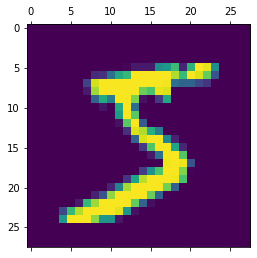

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
# Scaling the values to increase the accuracy.
x_train= x_train/ 255
x_test= x_test/255

In [9]:
x_train_flatten= x_train.reshape(len(x_train), 28*28)

In [10]:
x_test_flatten= x_test.reshape(len(x_test), 28*28)

In [11]:
len(x_train_flatten)

60000

In [12]:
x_test_flatten.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid' )
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
             )
model.fit(x_train_flatten, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4873 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3057 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2854 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9260


In [14]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9267


[0.2673887312412262, 0.9266999959945679]

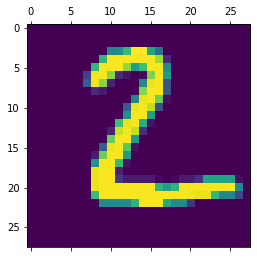

In [15]:
plt.matshow(x_test[1])

In [16]:
y_predicted= model.predict(x_test_flatten)

In [17]:
y_predicted[0]

array([1.3544683e-05, 1.2412329e-10, 2.8547380e-05, 7.9213083e-03,
       8.3645995e-07, 7.6572978e-05, 9.0297270e-10, 7.7298248e-01,
       6.0975231e-05, 8.8354945e-04], dtype=float32)

In [18]:
np.argmax(y_predicted[1])

2

In [19]:
#Convert y_predicted array values to label values using argmax function.
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm= tf.math.confusion_matrix(y_test, predictions= y_predicted_labels)

Text(69.0, 0.5, 'truth')

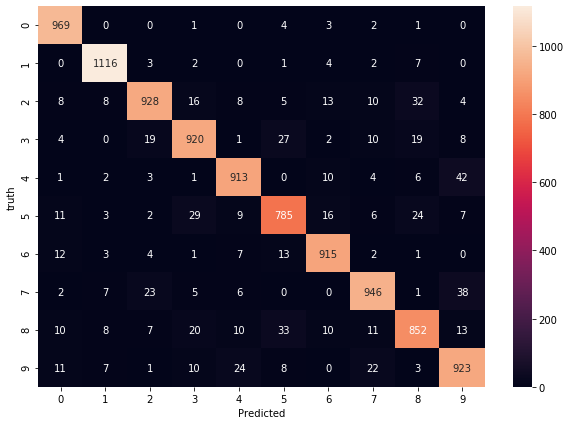

In [21]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')

# Adding Hidden layer.

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation= 'relu' ),
    keras.layers.Dense(10, activation= 'sigmoid' )
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
             )
model.fit(x_train_flatten, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.9188
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1347 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0970 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9811


In [23]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9756


[0.08038029074668884, 0.975600004196167]

#Without preprocessing i.e. without Flatten

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, activation= 'relu' ),
    keras.layers.Dense(10, activation= 'sigmoid' )
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
             )
model.fit(x_train, y_train, epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9178
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1349 - accuracy: 0.9603
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0955 - accuracy: 0.9712
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9779
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9821
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9880
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9894
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.024

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9761


[0.09087222814559937, 0.9761000275611877]

In [26]:
model_poisson = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, activation= 'relu' ),
    keras.layers.Dense(10, activation= 'sigmoid' )
])

model_poisson.compile(
    optimizer= 'adam', 
    loss= 'poisson',
    metrics= ['accuracy']
             )
model_poisson.fit(x_train, y_train, epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0088 - accuracy: 0.1334
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1325
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1244
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1168
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1115
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1074
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1047
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1032
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0000 - accuracy: 0.1016
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.000

In [27]:
model_KLD = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, activation= 'relu' ),
    keras.layers.Dense(10, activation= 'sigmoid' )
])

model_KLD.compile(
    optimizer= 'adam', 
    loss= 'KLDivergence',
    metrics= ['accuracy']
             )
model_KLD.fit(x_train, y_train, epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.1228
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9411e-05 - accuracy: 0.1249
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1916e-06 - accuracy: 0.1157
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.1694e-07 - accuracy: 0.1091
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.0857e-06 - accuracy: 0.1046
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.4124e-06 - accuracy: 0.1018
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5261e-06 - accuracy: 0.1006
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5658e-06 - accuracy: 0.0994
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: -1.5806e-06 - accuracy: 0.0991
Epoch 10/15
1875/1875 [=====================